<img src = "LogoUdeA.png">

<h1 align="center"> Simulación: Estudiantes incomunicados (Local choice) </h1>

<h2 align="center"> Rodolfo Restrepo Villegas </h2>

<h3 align="center"> Instituto de Física - Universidad de Antioquia </h3>

--- ---

<h3> Resumen, introducción y demás chorradas... </h3>

In [2]:
#%%%%%%%%%%%%%%%%%%%%%% Preambulo %%%%%%%%%%%%%%%%%%%%%%%%%

%pylab inline
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import os
#from time import time

Populating the interactive namespace from numpy and matplotlib


In [3]:
#%%%%%%%%%%%%%%%%%%%%%% Definiciones %%%%%%%%%%%%%%%%%%%%%%

n =  100000          # Número de repeticiones

L = 0.50             # Probabilidad de la sub-estrategía izquierda  
R = 1 - L            # Probabilidad de la sub-estrategía derecha

Z = 1.0/3.0          # Probabilidad de que mida en 0°
T = 1.0/3.0          # Probabilidad de que mida en 30°
S = 1.0/3.0          # Probabilidad de que mida en 60°




# Número tetráedrico, o número piramidal triangular 
def T_n(n):
    return (n+1)*(n+2)*(n+3)/6
# Este número encuentra el tamaño del arreglo de probabilidades.

#%%%%%%%%%%%%%%%%%%%%%% Algoritmo %%%%%%%%%%%%%%%%%%%%%%%%%

#Se generan diferentes combinaciones de estrategias
def Probabilities(P):
    List = []
    #
    Alpha =  0.0       # Probabilidad de elegir estrategia A
    Beta  =  0.0       # Probabilidad de elegir estrategia B
    Gamma =  0.0       # Probabilidad de elegir estrategia C
    Delta =  0.0       # Probabilidad de elegir estrategia D
    
    delta_p = 1.0/P    # Se define el paso.
    
    # Primer ciclo for: i entre [0,P]. 
    for i in xrange(0, int(1.0/delta_p) + 1):
        # Segundo ciclo for: j entre [0,i].
        for j in xrange(0, i + 1):
            # Tercer ciclo for: k entre [0,j].
            for k in xrange(0, j + 1):
                Alpha = 1.0 - i*delta_p
                Beta = delta_p*(i - j)
                Gamma = delta_p*(j - k)
                Delta = 1 - Alpha - Beta - Gamma
                List.append([Alpha, Beta, Gamma, Delta])
                
    return List

def Estrategia(Alpha, Beta, Gamma, Delta, M):
    for i in xrange(n):
        r = np.random.uniform()
        p = np.random.uniform()
        if r <= Alpha:
            if p <= L:
                M.append(['A','A','A'])
            elif L < p <= R + L:
                M.append(['P','P','P'])
        elif Alpha <= r < Alpha + Beta:
            if p <= L:
                M.append(['A','P','P'])
            elif L < p <= R + L:
                M.append(['P','A','A'])
        elif Alpha + Beta <= r < Alpha + Beta + Gamma:
            if p <= L:
                M.append(['P','A','P'])
            elif L < p <= R + L:
                M.append(['A','P','A'])
        elif Alpha + Beta + Gamma <= r <= 1:
            if p <= L:
                M.append(['P','P','A'])
            elif L < p <= R + L:
                M.append(['A','A','P'])
    return M
    
def Alice(M, P, Arreglo):
    #T2_i = time()
    
    # Se inicia el arreglo vacío.
    Arreglo = []
    
    """
    # Se crea la ruta para guardar los datos
    dir_path = os.path.join('Datos', 'Datos_P=' + str(P))
    try:
        # Se crea el directorio
        os.makedirs(dir_path)
    # Si ya existe simplemente lo omite
    except OSError:
        print 'El directorio ya existe y no fue creado'
        pass
    """
    
    # Se crean los .txt
    #archivo = open(os.path.join(dir_path, txtnameA), 'wb')
    
    # Se abre el archivo para guardar los datos
    #archivo = open(os.path.join(dir_path, txtnameA), 'a')
    
    # Para barrer M
    for j in xrange(0,len(M)):
        
        # Se genera la pregunta para alice (0-30-60)
        alice = np.random.randint(0,3) 
        
        # Si alice == 0 => 0 grados
        if alice == 0:
            if M[j][0] == 'A':
                Arreglo.append(['0' '  ' 'A'])
                #archivo.write('0' '  ' 'A' '\n')
            elif M[j][0] == 'P':
                Arreglo.append(['0' '  ' 'P'])
                #archivo.write('0' '  ' 'P' '\n')
                
        # Si alice == 1 => 30 grados
        elif alice == 1:
            if M[j][1] == 'A':
                Arreglo.append(['30' ' ' 'A'])
                #archivo.write('30' ' ' 'A' '\n')
            elif M[j][1] == 'P':
                Arreglo.append(['30' ' ' 'P'])
                #archivo.write('30' ' ' 'P' '\n')
        
        # Si alice == 2 => 60 grados
        elif alice == 2:
            if M[j][2] == 'A':
                Arreglo.append(['60' ' ' 'A'])
                #archivo.write('60' ' ' 'A' '\n')
            elif M[j][2] == 'P':
                Arreglo.append(['60' ' ' 'P'])
                #archivo.write('60' ' ' 'P' '\n')
                
    #archivo.close()
    #T2_f = time()
    #T2_e = T2_f - T2_i
    #print 'Archivo ' + txtnameA +  ' guardado con éxito', 'Tiempor de ejecución:', T2_e
    return Arreglo

def Bob(M, P, Arreglo):
    # Se inicia el arreglo vacío.
    Arreglo = []
    
    """ 
    # Se crea la ruta para guardar los datos
    dir_path = os.path.join('Datos', 'Datos_P=' + str(P))
    try:
        # Se crea el directorio
        os.makedirs(dir_path)
    # Si ya existe simplemente lo omite
    except OSError:
        print 'El directorio ya existe y no fue creado'
        pass
    """
    
    # Se crean los .txt
    #archivo = open(os.path.join(dir_path, txtnameB), 'wb')
    
    # Se abre el archivo para guardar los datos
    #archivo = open(os.path.join(dir_path, txtnameB), 'a')
    
    # Para barrer M
    for j in xrange(0,len(M)):
        
        # Se genera la pregunta para bob (0-30-60)
        bob = np.random.randint(0,3) 
        
        # Si alice == 0 => 0 grados
        if bob == 0:
            if M[j][0] == 'A':
                Arreglo.append(['0' '  ' 'A'])
                #archivo.write('0' '  ' 'A' '\n')
            elif M[j][0] == 'P':
                Arreglo.append(['0' '  ' 'P'])
                #archivo.write('0' '  ' 'P' '\n')
                
        # Si alice == 1 => 30 grados
        elif bob == 1:
            if M[j][1] == 'A':
                Arreglo.append(['30' ' ' 'A'])
                #archivo.write('30' ' ' 'A' '\n')
            elif M[j][1] == 'P':
                Arreglo.append(['30' ' ' 'P'])
                #archivo.write('30' ' ' 'P' '\n')
        
        # Si alice == 2 => 60 grados
        elif bob == 2:
            if M[j][2] == 'A':
                Arreglo.append(['60' ' ' 'A'])
                #archivo.write('60' ' ' 'A' '\n')
            elif M[j][2] == 'P':
                Arreglo.append(['60' ' ' 'P'])
                #archivo.write('60' ' ' 'P' '\n')
                
    #archivo.close()
    #print 'Archivo ' + txtnameB + ' guardado con éxito'
    return Arreglo
    

#%%%%%%%%%%%%%%%%%%%%%% Run it! %%%%%%%%%%%%%%%%%%%%%%%%%
    
def Run(P):
    Prob = Probabilities(P)
    Matriz_A = []
    Matriz_B = []
    Arreglo_A = []
    Arreglo_B = []
    for l in xrange(0, len(Prob)):
        Alpha, Beta, Gamma, Delta = Prob[l]
        # Se devuelve a cero la Lista para el proximo conjunto de probabilidades
        M = []
        # Se invoca la estrategia (arreglo completo de todas las estrategias que se van a jugar) 
        # común a ambos
        Matriz = Estrategia(Alpha, Beta, Gamma, Delta, M)
        # Se invoca a las funcionde de Alice y Bob con sus respectivos .txt
        Alice_A = Alice(Matriz, P, Arreglo_A)
        Bob_B = Bob(Matriz, P, Arreglo_B)
        Matriz_A.append(Alice_A)
        Matriz_B.append(Bob_B)
    
    np.savetxt('Datos/Datos_A_' + str(P) + '.txt', np.column_stack((Matriz_A)), delimiter='\t', fmt='%s',
               comments='#',header='Todos los datos de Alice \n Número total de columnas:' + str(len(Prob)))
    np.savetxt('Datos/Datos_B_' + str(P) + '.txt', np.column_stack((Matriz_B)), delimiter='\t', fmt='%s', 
               comments='#', header='Todos los datos de Bob. \n Número total de columnas:' + str(len(Prob)))
    print 'Done!'
    
        
# Run Forest, Run!
#Run(15)

In [4]:
# %%%%%%%%%%%%%%%%%%%%%% Cargar datos %%%%%%%%%%%%%%%%%%%%%%%%%

def cargar_Alice(txtname, P):
    # Se lee la ruta donde están los datos
    dir_path = os.path.join('../E-I', 'Datos')
    ''' load the file using std open'''
    f = np.loadtxt(os.path.join(dir_path,txtname + str(P) + '.txt'), dtype = str)
    return f

def cargar_Bob(txtname, P):
    # Se lee la ruta donde están los datos
    dir_path = os.path.join('../E-I', 'Datos')
    ''' load the file using std open'''
    f = np.loadtxt(os.path.join(dir_path,txtname + str(P) + '.txt'), dtype = str)
    return f

M_A = cargar_Alice('Datos_A_', 15)
M_B = cargar_Bob('Datos_B_', 15)

In [5]:
# %%%%%%%%%%%%%%%%%%%%%% Leer datos %%%%%%%%%%%%%%%%%%%%%%%%%

def leer_Alice(Alice, j):
    s = [M_A[:,j],M_A[:,j+1]]
    for i in range(0, len(s[0])):
        l = [s[0][i], s[1][i]]
        Alice.append(l)
    
    #print 'Longitud de Alice: ', len(Alice)
    return Alice

def leer_Bob(Bob, j):
    s = [M_B[:,j],M_B[:,j+1]]
    for i in range(0, len(s[0])):
        l = [s[0][i], s[1][i]]
        Bob.append(l)
    
    #print 'Longitud de Bob: ', len(Bob)
    return Bob

#%%%%%%%%%%%%%%%%%%%%%% Comparación %%%%%%%%%%%%%%%%%%%%%%%%

#%%%%%%%%%%%%%%%%%%%%%% Fact #1 %%%%%%%%%%%%%%%%%%%%%%%%%%%%

def fact1(A,B):
    C = []
    D = []
    a1 = ['0', 'A']
    b1 = ['30','A']
    c1 = ['60','A']
    a2 = ['0', 'P']
    b2 = ['30','P']
    c2 = ['60','P']
    
    for i in xrange(0, len(A)):
        if (A[i] == a1 and B[i] == a1) or (A[i] == a1 and B[i] == a2):
            C.append([A[i],B[i]])
        elif (A[i] == a2 and B[i] == a1) or (A[i] == a2 and B[i] == a2):
            C.append([A[i],B[i]])
        elif (A[i] == b1 and B[i] == b1) or (A[i] == b1 and B[i] == b2):
            C.append([A[i],B[i]])
        elif (A[i] == b2 and B[i] == b1) or (A[i] == b2 and B[i] == b2):
            C.append([A[i],B[i]])
        elif (A[i] == c1 and B[i] == c1) or (A[i] == c1 and B[i] == c2):
            C.append([A[i],B[i]])
        elif (A[i] == c2 and B[i] == c1) or (A[i] == c2 and B[i] == c2):
            C.append([A[i],B[i]])
            
    #print 'Posibles Facto #1: ', len(C)
    
    if len(C) != 0:
        for j in xrange(0, len(C)):
            if C[j][0] == C[j][1]:
                D.append([C[j][0],C[j][1]])
        #print 'Coincidencias Facto #1: ', len(D)
        #'% Facto #1: '
        f1 = len(D)*100.0/len(C)
    return f1 

#%%%%%%%%%%%%%%%%%%%%%% Fact #2 %%%%%%%%%%%%%%%%%%%%%%%%%%%%

def fact2(A,B):
    C = []
    D = []
    a1 = ['0', 'A']
    b1 = ['30','A']
    c1 = ['60','A']
    a2 = ['0', 'P']
    b2 = ['30','P']
    c2 = ['60','P']
    
    for j in xrange(0,  len(A)):
        if (A[j] == a1 and B[j] == b1) or (A[j] == b1 and B[j] == a1):
            C.append([A[j],B[j]])
        elif (A[j] == a1 and B[j] == b2) or (A[j] == b2 and B[j] == a1):
            C.append([A[j],B[j]])    
        elif (A[j] == a2 and B[j] == b2) or (A[j] == b2 and B[j] == a2):
            C.append([A[j],B[j]])
        elif (A[j] == a2 and B[j] == b1) or (A[j] == b1 and B[j] == a2):
            C.append([A[j],B[j]])
        elif (A[j] == b1 and B[j] == c1) or (A[j] == c1 and B[j] == b1):
            C.append([A[j],B[j]])
        elif (A[j] == b1 and B[j] == c2) or (A[j] == c2 and B[j] == b1):
            C.append([A[j],B[j]])
        elif (A[j] == b2 and B[j] == c2) or (A[j] == c2 and B[j] == b2):
            C.append([A[j],B[j]])
        elif (A[j] == b2 and B[j] == c1) or (A[j] == c1 and B[j] == b2):
            C.append([A[j],B[j]])
            
    #print  'Posibles Facto #2:', len(C)
    
    if len(C) != 0:
        for i in xrange(0, len(C)):
            if (C[i][0] == a1 and C[i][1] == b1) or (C[i][0] == b1 and C[i][1] == a1):
                D.append([C[i][0],C[i][1]])
            elif (C[i][0] == b1 and C[i][1] == c1) or (C[i][0] == c1 and C[i][1] == b1):
                D.append([C[i][0],C[i][1]])
            elif (C[i][0] == a2 and C[i][1] == b2) or (C[i][0] == b2 and C[i][1] == a2):
                D.append([C[i][0],C[i][1]])
            elif (C[i][0] == b2 and C[i][1] == c2) or (C[i][0] == c2 and C[i][1] == b2):
                D.append([C[i][0],C[i][1]])
        #print 'Coincidencias Facto #2: ', len(D)
        #'% Facto #2: '
        f2 = len(D)*100.0/len(C)
    return f2

#%%%%%%%%%%%%%%%%%%%%%% Fact #3 %%%%%%%%%%%%%%%%%%%%%%%%%%%%

def fact3(A,B):
    C = []
    D = []
    a1 = ['0', 'A']
    b1 = ['60','A']
    a2 = ['0', 'P']
    b2 = ['60','P']
    
    for j in xrange(0,  len(A)):
        if (A[j] == a1 and B[j] == b1) or (A[j] == b1 and B[j] == a1):
            C.append([A[j],B[j]])
        elif (A[j] == a2 and B[j] == b2) or (A[j] == b2 and B[j] == a2):
            C.append([A[j],B[j]])
        elif (A[j] == a1 and B[j] == b2) or (A[j] == b2 and B[j] == a1):
            C.append([A[j],B[j]])
        elif (A[j] == a2 and B[j] == b1) or (A[j] == b1 and B[j] == a2):
            C.append([A[j],B[j]])
            
    #print 'Posibles Facto #3: ', len(C)
    
    if len(C) != 0:
        for k in xrange(0, len(C)):
            if (C[k][0] == a1 and C[k][1] == b1) or (C[k][0] == a2 and C[k][1] == b2):
                D.append([C[k][0],C[k][1]])
            elif (C[k][0] == b1 and C[k][1] == a1) or (C[k][0] == b2 and C[k][1] == a2):
                D.append([C[k][0],C[k][1]])
        #print 'Coincidencias Facto #3: ' , len(D)
        #'% Facto #3: '
        f3 = len(D)*100.0/len(C)
    return f3
    
# Se comprueba el Facto #0
def fact0(A,B):
    D = []
    C = []
    a1 = ['0', 'A']
    b1 = ['30','A']
    c1 = ['60','A']
    
    for k in xrange(0, len(A)):
        if(A[k] == a1 or A[k] == b1 or A[k] == c1):
            C.append(A[k])
    print 'Facto #0 para Alice: ', '% de A = ', len(C)*100.0/len(A), '% de P = ', (len(A)-len(C))*100.0/len(A)
    
    for l in xrange(0, len(B)):
        if (B[l] == a1 or B[l] == b1 or B[l] == c1):
            D.append(B[k])
    print 'Facto #0 para Bob: ', '% de A = ', len(D)*100.0/len(B), '% de P = ', (len(B) - len(D))*100.0/len(B) 
    
    
#F1 = fact1(Alice, Bob)
#F2 = fact2(Alice, Bob)
#F3 = fact3(Alice, Bob)
#F0 = fact0(Alice, Bob)

def Run_Facts(P):
    Prob = Probabilities(P)
    Flist_2 = []
    Flist_3 = []
    for m in xrange(0, 2*len(Prob), 2):
        Alice = []
        Bob = []
        A_list = leer_Alice(Alice, m)
        B_list = leer_Bob(Bob, m)
        #F0 = fact0(A_list, B_list)
        #F1 = fact1(A_list, B_list)
        F2 = fact2(A_list, B_list)
        F3 = fact3(A_list, B_list)
        Flist_2.append(F2)
        Flist_3.append(F3)
        
        """
        if ((3.0/4.0)*100 - R <= F2 <= (3.0/4.0)*100 + R) or ((1.0/4.0)*100 - R <= F3 <= (1.0/4.0)*100 + R):
            print F2, F3, Prob[m]
        """
    return Flist_2, Flist_3
        

def Ploting_Facts(P):
    F_2, F_3 = Run_Facts(P)
    plt.figure()
    plt.plot(F_3, F_2, 'r.')
    plt.plot(25,75, 'ko', label="Q")
    plt.xlabel('Fact #3')
    plt.ylabel('Fact #2')
    plt.suptitle('Classical Behavior of Incomunicated Students', fontsize = 14)
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig('Estudiantes_F3vF2_P=' + str(P) + '.png')
    plt.show()
        
#Ploting_Facts(15)

In [6]:
#%%%%%%%%%%%%%%%%%%%%%% Together %%%%%%%%%%%%%%%%%%%%%%%%%%%

def Ploting_T():
    dir_path = os.path.join('../E-I', 'Datos')
    for file in os.listdir("../E-I/Datos"):
        if file.endswith(".txt"):
            f = open(os.path.join(dir_path, file), 'r')
    return f
            
#Ploting_T()

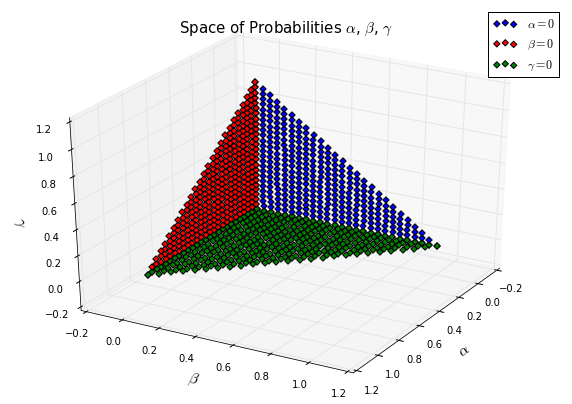

In [35]:
""" Empezar a escribir, hacer dos enfoques: uno para la geometría y otro para las tampras."""

def Plotting_Prob(P):
    Prob = Probabilities(P)
    xs = []
    ys = []
    zs = []
    Alpha_0 =[]
    Beta_0 = []
    Gamma_0 = []
    for j in xrange(0, len(Prob)):
        xs.append(Prob[j][0])
        ys.append(Prob[j][1])
        zs.append(Prob[j][2])
        if xs[j] == 0:
            Alpha_0.append([ys[j],zs[j]])
        if ys[j] == 0:
            Beta_0.append([xs[j],zs[j]])
        if zs[j] == 0:
            Gamma_0.append([xs[j],ys[j]])
    fig = plt.figure(figsize=(10,7))
    axis = fig.add_subplot(111, projection='3d')
    #axis.scatter(xs, ys, zs, c='b', marker='.')
    for l in xrange(0, len(Alpha_0)):
        scatter1 = axis.scatter(0, Alpha_0[l][0], Alpha_0[l][1], c='b', marker='D')
        scatter2 = axis.scatter(Beta_0[l][0], 0, Beta_0[l][1], c='r', marker='D')
        scatter3 =axis.scatter(Gamma_0[l][0],Gamma_0[l][1], 0, c='g', marker='D')
    axis.set_xlabel(r'${\alpha}$', fontsize = 15)
    axis.set_ylabel(r'${\beta}$', fontsize = 15)
    axis.set_zlabel(r'${\gamma}$', fontsize = 15)
    axis.legend([scatter1, scatter2,  scatter3], [r'$\alpha = 0$', r'$\beta = 0$', r'$\gamma = 0$'
], numpoints = 1)
    axis.grid(True)
    axis.autoscale_view()
    plt.title(r"Space of Probabilities $\alpha$, $\beta$, $\gamma$ ", fontsize = 15)
    axis.view_init(30.0, 30)
    plt.show()
    #plt.savefig('Probabilities_P=' + str(P) + '.jpg', dpi=fig.dpi)
    
Plotting_Prob(25)


def Run_Facts_Caras(P, Prob_0):
    Prob = Probabilities(P)
    Flist_2 = []
    Flist_3 = []
    Face = []
    xs = []
    ys = []
    zs = []
    for n in xrange(0, len(Prob)):
        xs.append(Prob[j][0])
        ys.append(Prob[j][1])
        zs.append(Prob[j][2])
        if face == [Prob[n][1], Prob[n][2]]:
            for m in xrange(0, 2*len(Prob), 2):
                Alice = []
                Bob = []
                A_list = leer_Alice(Alice, m)
                B_list = leer_Bob(Bob, m)
                #F0 = fact0(A_list, B_list)
                #F1 = fact1(A_list, B_list)
                F2 = fact2(A_list, B_list)
                F3 = fact3(A_list, B_list)
                Flist_2.append(F2)
                Flist_3.append(F3)
    return Flist_2, Flist_3
                
#Run_Facts_Caras(10, a1)

In [8]:
a = []
b = []
g= Estrategia(0.25,0.25,0.25,0.25, a)

w= Estrategia(0.2,0.2,0.3,0.3,b)

g = np.array(g)
w = np.array(w)

h = np.column_stack((g,w))

f = np.savetxt('Prueba.txt', g, delimiter=" ", fmt='%s', newline='\n', header='Esto es una prueba')

f = np.savetxt('Prueba.txt', w, delimiter=" ", fmt='%s', newline='\n', header='Esto es una prueba')


In [9]:
0.0732839107513*2*T_n(50)/60

57.22496310866513

In [10]:
T_n(20)

1771

In [11]:
2*488.3*T_n(50)/1024

22341.632421875

In [12]:
l = []
x,y = Alice(g, 1, a), Bob(g,1,b)

l.append(x[0:10])
#x.insert(0,['0.25', '0.25', '0.25', '0.25'])
#y.insert(0,['0.25', '0.25', '0.25', '0.25'])

print l

#np.savetxt('Prueba.out', x, delimiter=',')
np.savetxt('Datos/Prueba.out', np.column_stack((x,y)), delimiter='\t', fmt='%s', comments='#' , header='Se prueva los comentarios \n FilaA\tFilaB')
prueba = np.loadtxt('Datos/Prueba.out', dtype = str)

[[['60 P'], ['0  P'], ['60 A'], ['30 A'], ['30 P'], ['0  A'], ['0  A'], ['0  A'], ['60 P'], ['30 P']]]
